In [78]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from random import randint

# knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier


from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import PolynomialFeatures



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score



# Table of Contents


.


* [Exploration](#exploration)


.


* [Data Preprocessing](#preprocessing)
    - [Social Status](#socialstatus)
    - [Family Status](#familystatus)
    - [Embarked](#Embarked)
    - [Ticket](#Ticket)
    - [Some Processing](#someprocess)
    - [Bridge](#bridge)
    - [Dealing Nan Age](#nanage)
    - [Deeper into Social Status](#deepersocialstatus)
    - [Correlation Process](#corelationprocess)
    
    
 .





* [Training Data Preprocessing](#trainingpreprocessing)
    - [Social Status](#socialstatus)
    - [Family Status](#familystatus)
    - [Some Processing](#someprocess)
    - [Bridge](#bridge)
    - [Dealing Nan Age](#nanage)
    - [Deeper into Social Status](#deepersocialstatus)
    - [Correlation Process](#corelationprocess)
    - [KNN](#knn)
    - [SGD](#sgd)
    - [LinearSVC](#linearsvc)
    - [SVC](#svc)
    - [NaiveBayes](#gnb)
    - [Perceptron](#clf)
    - [Model Results](#modelresult)
    

<a id="exploration"></a>
# Exploration

In [3]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

training_data = pd.read_csv('../input/titanic/train.csv')

In [4]:
# BASIC EXPLORATION

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape

(891, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id="preprocessing"></a>
# Data Preprocessing

<a id="socialstatus"></a>
# Social Status

In [9]:
# I see miss, mr but I want to know if we've got something else and well maybe if you are like a king you are the first saved ?

names = train['Name']
social_status = []
family_name = []

for name in names:
    f_name =  name.split(',')[0]
    splitted = name.split(',')[1]
    splitted = splitted.split('.')[0]
    #print(splitted)
    social_status.append(splitted)
    family_name.append(f_name)
    
files = pd.Series(social_status)
#print(Counter(social_status))
train['Title'] = files


files = pd.Series(family_name)
#print(Counter(family_name))
train['FamilyName'] = files


titles = []
for title in test:
    test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
    
for item in test['Title']:
    if item not in titles:
        titles.append(item)

for item in train['Title']:
    if item not in titles:
        titles.append(item)

        
encoded_titles = []
for i, item in enumerate(titles):
    encoded_titles.append(i)
    
def titles_encoder(title):
    #titles = [' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr', ' Dona', ' Don', ' Mme', ' Major', ' Lady', ' Sir', ' Mlle', ' Capt', ' Countess', ' Jonkheer']
    #encoded_titles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
    
    title = str(title)
    if title in titles:
        text_index = titles.index(title)
        encoded = encoded_titles[text_index]
        return int(encoded)


train['TitleEncoded'] = train['Title'].apply(titles_encoder)
train['TitleEncoded'].value_counts()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyName,TitleEncoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings,10
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,11
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle,10
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev,Montvila,14
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,Graham,11
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Johnston,11
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,Behr,9


In [10]:
def bar_chart(feature, title):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(15,10)).set(title=f'{title}')

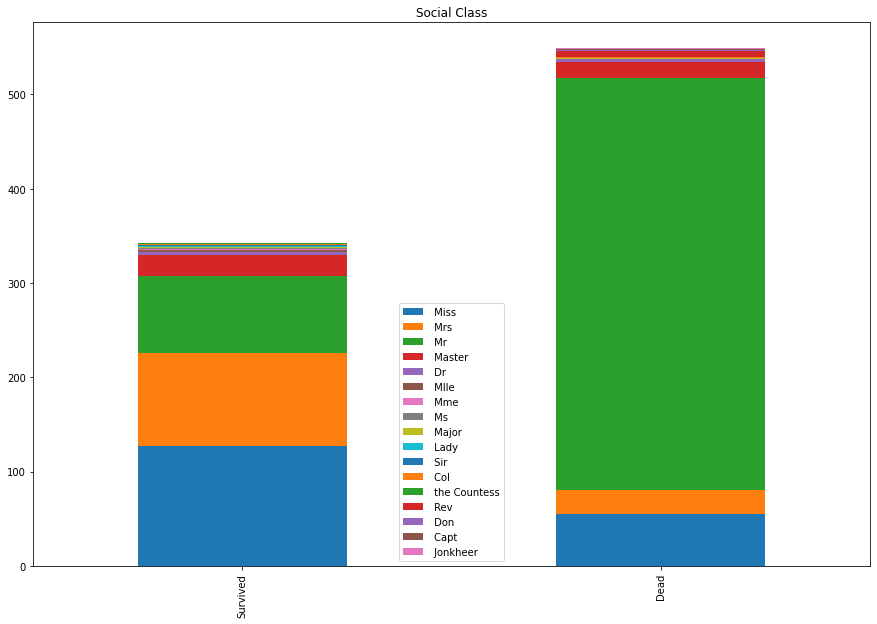

In [11]:
bar_chart('Title', 'Social Class')

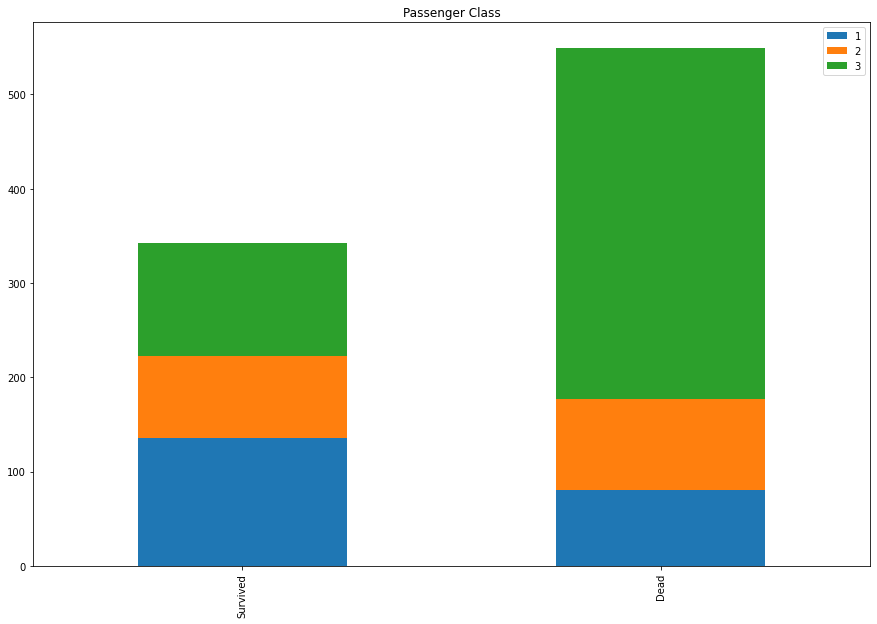

In [12]:
bar_chart('Pclass', 'Passenger Class')

<a id="familystatus"></a>
# Family Status

In [13]:
#sibsp 	# of siblings / spouses aboard the Titanic 	
#parch 	# of parents / children aboard the Titanic

#sibsp: The dataset defines family relations in this way...
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way...
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.

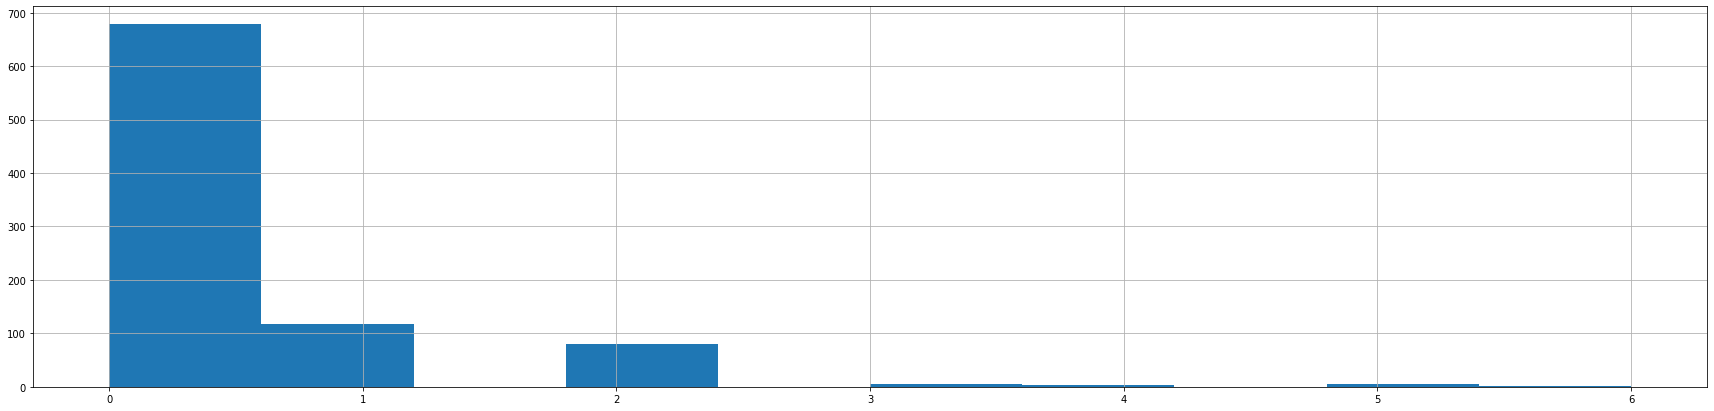

In [14]:
train['Parch'].hist(figsize=(30, 7));

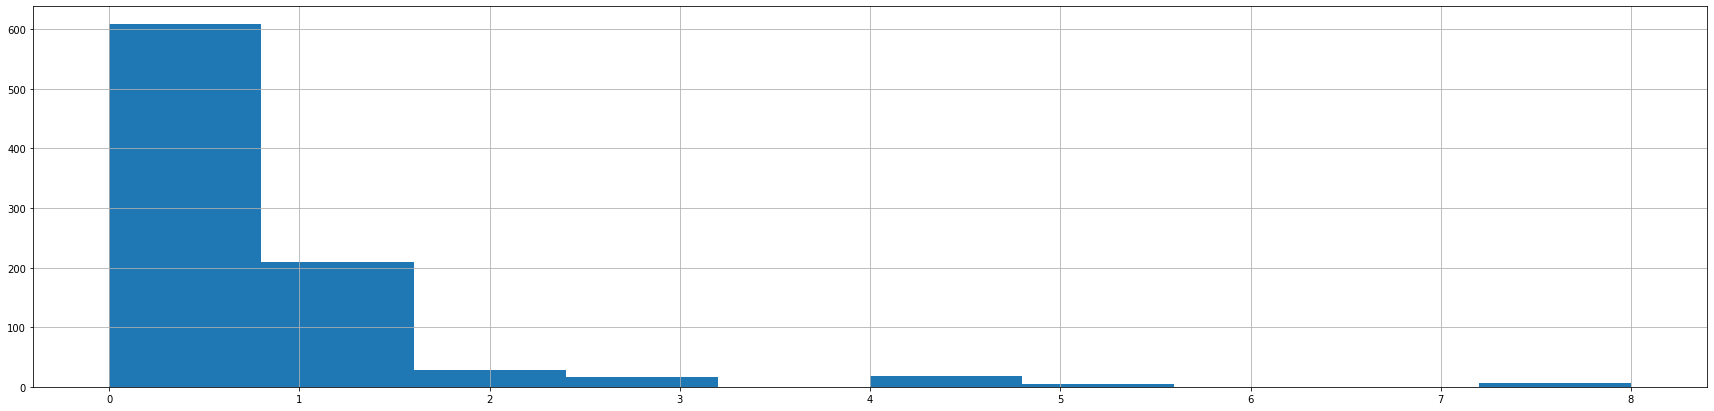

In [15]:
train['SibSp'].hist(figsize=(30, 7));

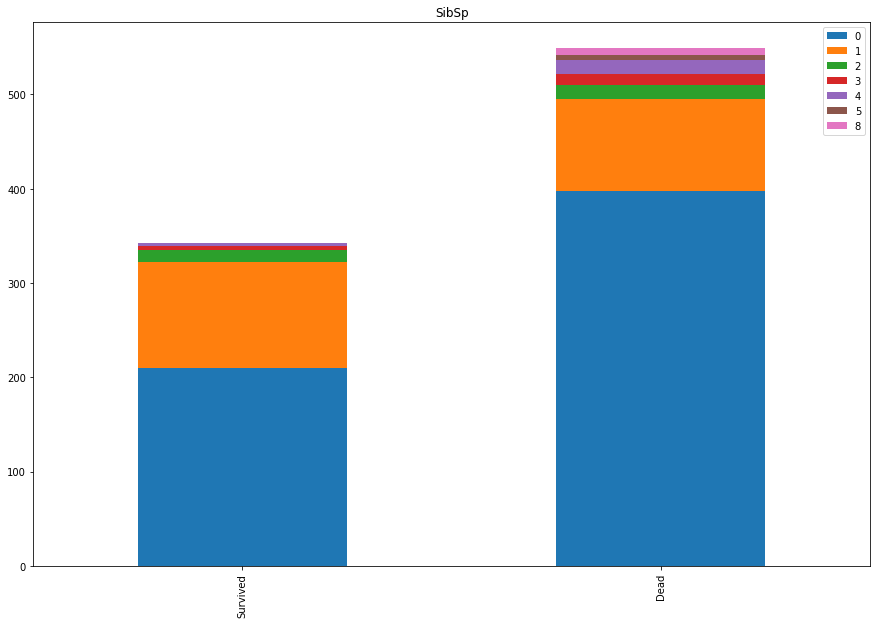

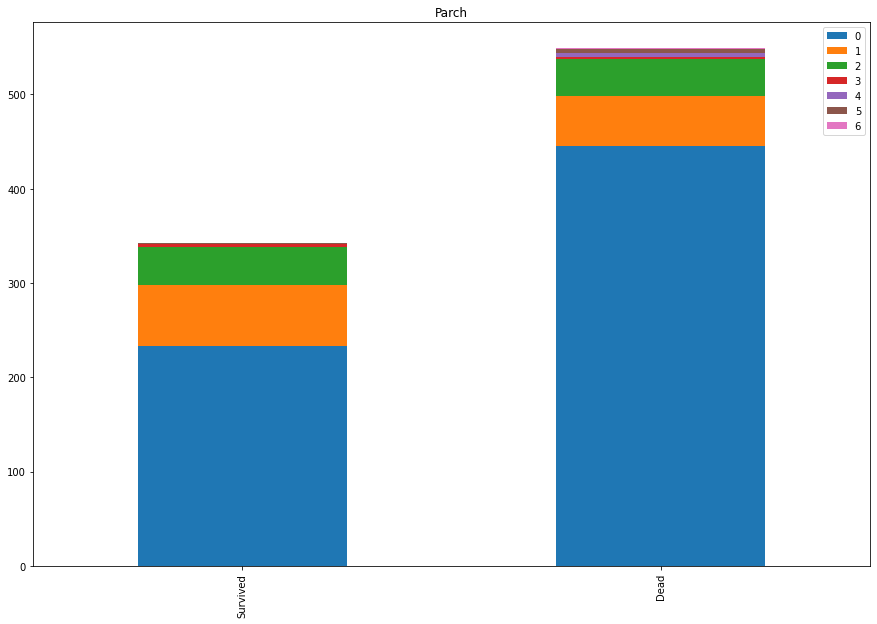

In [16]:
bar_chart('SibSp', 'SibSp')
bar_chart('Parch', 'Parch')

In [17]:

original_parch = train['Parch']
train['Parch'].replace([0], [1], inplace = True)
familysize = train['SibSp'] + train['Parch']


#print(Counter(family_name))
train['FamilySize'] = familysize
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyName,TitleEncoded,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,1,A/5 21171,7.2500,NaN,S,Mr,Braund,9,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,PC 17599,71.2833,C85,C,Mrs,Cumings,10,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,1,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen,11,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,1,113803,53.1000,C123,S,Mrs,Futrelle,10,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,1,373450,8.0500,NaN,S,Mr,Allen,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,1,211536,13.0000,NaN,S,Rev,Montvila,14,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,1,112053,30.0000,B42,S,Miss,Graham,11,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,Johnston,11,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,1,111369,30.0000,C148,C,Mr,Behr,9,1


In [18]:
Cumings =  train[(train['FamilyName'] == 'Cumings') & (train['FamilySize'] == 1)]
# cat1 = train[(train['FamilyName'] >= 20) & (train['Age'] <= 30)]
Johnston =  train[(train['FamilyName'] == 'Johnston')]
Johnston
Palsson =  train[(train['FamilyName'] == 'Palsson') & (train['FamilySize'] == 4)]
Cumings =  train[(train['FamilySize'] >= 3)]
Palsson

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyName,TitleEncoded,FamilySize
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S,Master,Palsson,12,4
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.075,NaN,S,Miss,Palsson,11,4
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.075,NaN,S,Miss,Palsson,11,4
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,Mrs,Palsson,10,4


In [19]:
Cumings
Rice =  train[(train['FamilyName'] == 'Rice') & (train['FamilySize'] == 5)]
Rice

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyName,TitleEncoded,FamilySize
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,Master,Rice,12,5
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q,Master,Rice,12,5
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q,Master,Rice,12,5
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q,Master,Rice,12,5
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q,Mrs,Rice,10,5


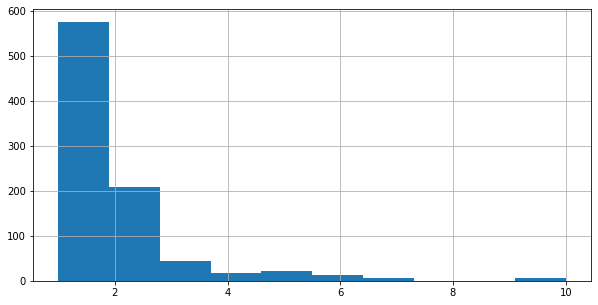

In [20]:
plt.figure(figsize = (10, 5))
train['FamilySize'].hist();

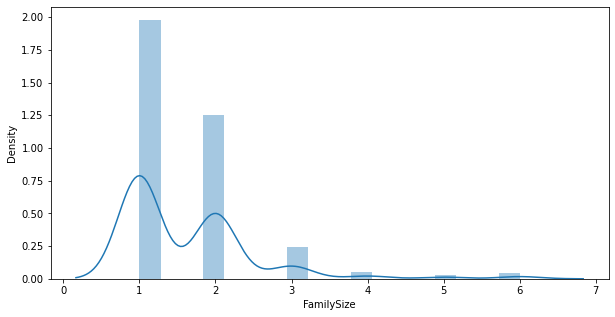

In [21]:
survived =  train[train['Survived'] == 1]
plt.figure(figsize = (10, 5))
sns.distplot(survived['FamilySize']);

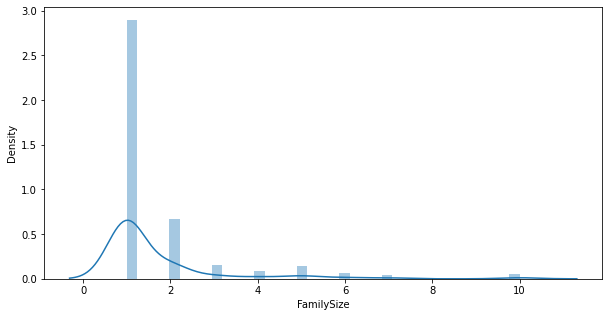

In [22]:
not_survived =  train[train['Survived'] == 0]
plt.figure(figsize = (10, 5))
sns.distplot(not_survived['FamilySize']);

<a id="Embarked"></a>
# Embarked

In [23]:
def embark_encoded(code):
    if str(code) == 'S':
        return 0
    elif str(code) == 'Q':
        return 1
    elif str(code) == 'C':
        return 2

In [24]:
train.at[61,'Embarked']= 'S'
train.at[829,'Embarked']= 'S'
train['EmbarkedNum'] = train['Embarked'].apply(embark_encoded)

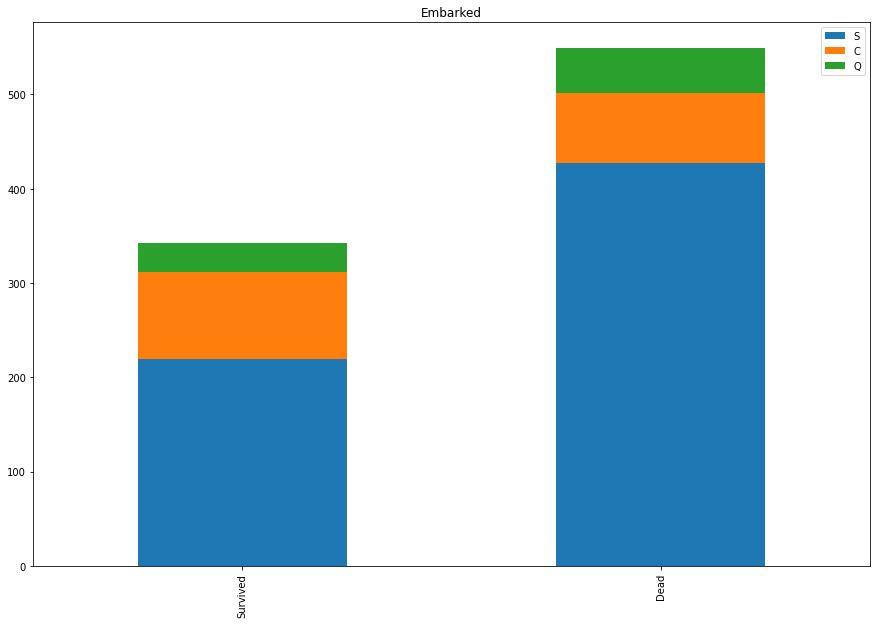

In [25]:
train['Embarked'].value_counts()
bar_chart('Embarked', 'Embarked')

<a id="Ticket"></a>
# Ticket

In [26]:
def get_ticket_number(text):
    text = text.split(' ')
    text = text[-1]
    if str(text) == 'LINE':
        text = 0
    return int(text)

def get_ticket_header(text):
    text = text.split(' ')
    text = text[0]
    return text

In [27]:
# cleaning the ticket text
train['TicketNumber'] = train['Ticket'].apply(get_ticket_number)
train['TicketHeader'] = train['Ticket'].apply(get_ticket_header)

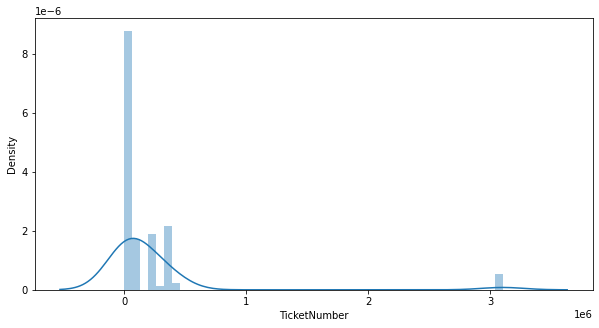

In [28]:

survived =  train[train['Survived'] == 1]
plt.figure(figsize = (10, 5))
sns.distplot(survived['TicketNumber']);

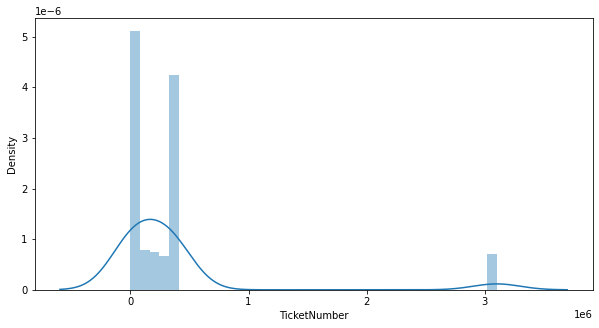

In [29]:
not_survived =  train[train['Survived'] == 0]
plt.figure(figsize = (10, 5))
sns.distplot(not_survived['TicketNumber']);

<a id="someprocess"></a>
# Some Processing

In [30]:
def text_cleaner(text):
    text = re.sub(r'[A-Za-z]', '', text)
    text = re.sub(r'/[0-9]', '', text)
    text = text.replace('.', '').replace('/', '')
    return text


def number_cleaner(text):
    text = str(text)
    text = text.split()[-1]
    text = re.sub(r'[0-9]', '', text)
    return text


def letter_cleaner(text):
    text = str(text)
    text = text.split()[-1]
    text = re.sub(r'[0-9]', '', text)
    return text

def get_cabin_number(text):
    text = str(text)
    splitted = text.split(' ')
    if text == 'nan':
        text = 0
    else:
        text = splitted[0]
        text = text[1:]
        if str(text).isdigit()==False:
            text = splitted[-1]
            text = text[1:]
            if str(text).isdigit()==False:
                text = 0
            

    return int(text)





In [31]:
training = train.copy()
training = train.drop(['Name', 'PassengerId',], axis = 1)

training['Sex'].replace(['male', 'female'], [0, 1], inplace = True)

# cleaning the CabinNumber
training['CabinLetter'] = training['Cabin'].apply(letter_cleaner)
training['CabinNumber'] = training['Cabin'].apply(get_cabin_number)
# Normalization de Fare
training['Fare'] = training['Fare'] / training['Fare'].max()

training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyName,TitleEncoded,FamilySize,EmbarkedNum,TicketNumber,TicketHeader,CabinLetter,CabinNumber
0,0,3,0,22.0,1,1,A/5 21171,0.014151,NaN,S,Mr,Braund,9,2,0,21171,A/5,nan,0
1,1,1,1,38.0,1,1,PC 17599,0.139136,C85,C,Mrs,Cumings,10,2,2,17599,PC,C,85
2,1,3,1,26.0,0,1,STON/O2. 3101282,0.015469,NaN,S,Miss,Heikkinen,11,1,0,3101282,STON/O2.,nan,0
3,1,1,1,35.0,1,1,113803,0.103644,C123,S,Mrs,Futrelle,10,2,0,113803,113803,C,123
4,0,3,0,35.0,0,1,373450,0.015713,NaN,S,Mr,Allen,9,1,0,373450,373450,nan,0


<a id="bridge"></a>
# Bridge


<h3>
<a href='https://titanic.pagesperso-orange.fr/page93.htm'>https://titanic.pagesperso-orange.fr/page93.htm</a>
</h3>


<table width="700" cellspacing="0" cellpadding="5" border="1" bgcolor="#DFFFDF">
    <tbody><tr>
        <td colspan="6" bgcolor="#008040" align="center"><font size="4" color="#FFFFFF"><strong>LOGEMENTS DE 1<sup>ère</sup>
        CLASSE</strong></font></td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td align="center"><strong>Cabines<br>
        à 1 lit</strong></td>
        <td align="center"><strong>Cabines<br>
        ou suites<br>
        à 2 lits</strong></td>
        <td align="center"><strong>Cabines<br>
        ou suites<br>
        à 3 lits</strong></td>
        <td align="center"><strong>Appartements<br>
        avec salon</strong></td>
        <td align="center"><strong>Nombre<br>
        de Passagers</strong></td>
    </tr>
    <tr>
        <td align="center"><strong>Pont A<br>
        Pont B<br>
        Pont C<br>
        Pont D<br>
        Pont E</strong></td>
        <td align="center"><strong>30<br>
        31<br>
        15<br>
        11<br>
        9</strong></td>
        <td align="center"><strong>-<br>
        34<br>
        62<br>
        8<br>
        2</strong></td>
        <td align="center"><strong>4<br>
        8<br>
        57<br>
        30<br>
        28</strong></td>
        <td align="center"><strong>-<br>
        2<br>
        2<br>
        -<br>
        -</strong></td>
        <td align="center"><strong>42<br>
        123<br>
        310<br>
        117<br>
        97</strong></td>
    </tr>
    <tr>
        <td align="center"><strong>TOTAL</strong></td>
        <td align="center"><strong>96</strong></td>
        <td align="center"><strong>106</strong></td>
        <td align="center"><strong>127</strong></td>
        <td align="center"><strong>4</strong></td>
        <td align="center"><strong>689</strong></td>
    </tr>
</tbody></table>

<table width="700" cellspacing="0" cellpadding="5" border="1" bgcolor="#FFE6FF"><tbody><tr>
        <td colspan="5" bgcolor="#FF7575" align="center"><font size="4" color="#FFFFFF"><strong>CABINES DE 2<sup>ème</sup>
        CLASSE</strong></font></td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td align="center"><strong>Cabines<br>
        à 2 lits<br>
        ou couchettes</strong></td>
        <td align="center"><strong>Cabines<br>
        à 3 couchettes</strong></td>
        <td align="center"><strong>Cabines<br>
        à 4 couchettes</strong></td>
        <td align="center"><strong>Nombre<br>
        de Passagers</strong></td>
    </tr>
    <tr>
        <td align="center"><strong>Pont D<br>
        Pont E<br>
        Pont F<br>
        Pont G</strong></td>
        <td align="center"><strong>19<br>
        15<br>
        19<br>
        23</strong></td>
        <td align="center"><strong>-<br>
        -<br>
        -<br>
        2</strong></td>
        <td align="center"><strong>20<br>
        49<br>
        45<br>
        15</strong></td>
        <td align="center"><strong>118<br>
        226<br>
        218<br>
        112</strong></td>
    </tr>
    <tr>
        <td align="center"><strong>TOTAL</strong></td>
        <td align="center"><strong>76</strong></td>
        <td align="center"><strong>2</strong></td>
        <td align="center"><strong>129</strong></td>
        <td align="center"><strong>674</strong></td>
    </tr>
</tbody>

</table>

<table width="700" cellspacing="0" cellpadding="5" border="1" bgcolor="#CEFFFF">
    <tbody><tr>
        <td colspan="7" bgcolor="#005AB5" align="center"><font size="4" color="#FFFFFF"><strong>CABINES DE 3<sup>ème</sup>
        CLASSE</strong></font></td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td align="center"><strong>Cabines à<br>
        2<br>
        couchettes</strong></td>
        <td align="center"><strong>Cabines à<br>
        4<br>
        couchettes</strong></td>
        <td align="center"><strong>Cabines à<br>
        6<br>
        couchettes</strong></td>
        <td align="center"><strong>Cabines à<br>
        8<br>
        couchettes</strong></td>
        <td align="center"><strong>Cabines à<br>
        10<br>
        couchettes</strong></td>
        <td align="center"><strong>Nombre<br>
        de Passagers</strong></td>
    </tr>
    <tr>
        <td nowrap="" align="center"><strong>Pont D<br>
        Pont E<br>
        Pont F<br>
        Pont G<br>
        Pont G avant<br>
        (dortoirs)</strong></td>
        <td align="center"><strong>4<br>
        26<br>
        31<br>
        5<br>
        -<br>
        &nbsp;</strong></td>
        <td align="center"><strong>-<br>
        40<br>
        59<br>
        13<br>
        -<br>
        &nbsp;</strong></td>
        <td align="center"><strong>7<br>
        8<br>
        18<br>
        4<br>
        -<br>
        &nbsp;</strong></td>
        <td align="center"><strong>-<br>
        -<br>
        5<br>
        -<br>
        -<br>
        &nbsp;</strong></td>
        <td align="center"><strong>-<br>
        -<br>
        2<br>
        -<br>
        -<br>
        &nbsp;</strong></td>
        <td align="center"><strong>50<br>
        260<br>
        466<br>
        86<br>
        164<br>
        &nbsp;</strong></td>
    </tr>
    <tr>
        <td align="center"><strong>TOTAL</strong></td>
        <td align="center"><strong>66</strong></td>
        <td align="center"><strong>112</strong></td>
        <td align="center"><strong>37</strong></td>
        <td align="center"><strong>5</strong></td>
        <td align="center"><strong>2</strong></td>
        <td align="center"><strong>1026</strong></td>
    </tr>
</tbody></table>

<table width="700" cellspacing="0" cellpadding="5" border="1" bgcolor="#FFFFD2">
    <tbody><tr>
        <td colspan="3" bgcolor="#FFFF86" align="center"><font size="4" color="#000000"><strong>RÉSUMÉ</strong></font></td>
    </tr>
    <tr>
        <td align="center">&nbsp;</td>
        <td align="center"><strong>Nombre<br>
        de logements</strong></td>
        <td align="center"><strong>Nombre<br>
        de Passagers</strong></td>
    </tr>
    <tr>
        <td align="center"><strong>1</strong><sup><strong>ère</strong></sup><strong>
        Classe<br>
        2</strong><sup><strong>ème</strong></sup><strong> Classe<br>
        3</strong><sup><strong>ème</strong></sup><strong> Classe
        en cabines<br>
        3</strong><sup><strong>ème</strong></sup><strong> Classe
        en dortoirs</strong></td>
        <td align="center"><strong>333<br>
        207<br>
        222<br>
        -</strong></td>
        <td align="center"><strong>735<br>
        674<br>
        862<br>
        164</strong></td>
    </tr>
    <tr>
        <td align="center"><strong>TOTAL</strong></td>
        <td align="center"><strong>762</strong></td>
        <td align="center"><strong>2435</strong></td>
    </tr>
</tbody></table>


First_class:

* Pont A ----------- 42  ------------|
* Pont B ----------- 123 ------------|--- 42 + 123 + 310 + 117 + 97 = 689
* Pont C ----------- 310 ------------|
* Pont D ----------- 117 ------------|
* Pont E ----------- 97  ------------|


Second_class:

* Pont D ----------- 118 ------------|
* Pont E ----------- 226 ------------|--- 118 + 226 + 218 + 112 = 674
* Pont F ----------- 218 ------------|
* Pont G ----------- 112 ------------|


Third_class

* Pont D ----------- 50  ------------|
* Pont E ----------- 260 ------------|--- 50 + 260 + 466 + 86 + 164 = 1026
* Pont F ----------- 466 ------------|
* Pont G ----------- 86  ------------|
* Pont G* ---------- 164 ------------|




* Pont A ----------- 42  ------------|--- 42
* Pont B ----------- 123 ------------|--- 123
* Pont C ----------- 310 ------------|--- 310
* Pont D ----------- 117 + 118 + 50 -|--- 285
* Pont E ----------- 97 + 226 + 260 -|--- 583
* Pont F ----------- 218 + 466 ------|--- 684
* Pont G ----------- 112 + 86 + 164 -|--- 362


* Pont T ----- Cabine de commande du Navire    ---> capt, major ... ???

In [32]:
# if I got the mean Fare of each class I could maybe fill some Na
# for this I need to know passenger class 
# from passenger class get class + get mean  --> figure out bridge
# theorie: if passenger is first class with low meaning he is probably into E Bridge
# also if paseenger is first class with hight meanings he is probably into A Bridge 


'''
nan    687
C       59
B       47
E       33
D       33
A       15
F        9
G        7
T        1

'''
class_letter = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']
training['Cabin'].value_counts()

cabin_class = []
class_meanings = []

for i in class_letter:
    cabin = training[(training['Cabin']== i)]
    #print(f'Class {i}:\t\t{cabin["Fare"].mean()}\t:meanFare')
    cabin_class.append(i)
    class_meanings.append(cabin["Fare"].mean())


'''
Class A:		0.0773406760080563	:meanFare
Class B:		0.22154849622037395	:meanFare
Class C:		0.1954823981884423	:meanFare
Class D:		0.11173397057512192	:meanFare
Class E:		0.08843819500619854	:meanFare
Class F:		0.042886921577419794	:meanFare
Class G:		0.021547250701864574	:meanFare
Class T:		0.06929138530460492	:meanFare
'''
def cabin_filler(value):
    #print(text)
    if value > 0.06 and value < 0.07:
        text = 'A'
    elif value > 0.19:
        text = 'B'
    elif value > 0.11 and value < 0.19:
        text = 'C'
    elif value > 0.08 and value < 0.11:
        text = 'D'
    elif value > 0.06 and value < 0.08:
        text = 'E'
    elif value > 0.04 and value < 0.06:
        text = 'F'
    elif value < 0.04:
        text = 'G'
    elif value > 0.04 and value < 0.07:
        text = 'T'
    else:
        print(value)
        
    return text


training['Bridge'] = training['Fare'].apply(cabin_filler)

#training = training.drop(['Cabin'], axis = 1)
training.head()


# I also know number of passenger by Bridge ( maybe not for the T Bridge)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilyName,TitleEncoded,FamilySize,EmbarkedNum,TicketNumber,TicketHeader,CabinLetter,CabinNumber,Bridge
0,0,3,0,22.0,1,1,A/5 21171,0.014151,NaN,S,Mr,Braund,9,2,0,21171,A/5,nan,0,G
1,1,1,1,38.0,1,1,PC 17599,0.139136,C85,C,Mrs,Cumings,10,2,2,17599,PC,C,85,C
2,1,3,1,26.0,0,1,STON/O2. 3101282,0.015469,NaN,S,Miss,Heikkinen,11,1,0,3101282,STON/O2.,nan,0,G
3,1,1,1,35.0,1,1,113803,0.103644,C123,S,Mrs,Futrelle,10,2,0,113803,113803,C,123,D
4,0,3,0,35.0,0,1,373450,0.015713,NaN,S,Mr,Allen,9,1,0,373450,373450,nan,0,G


In [33]:
'''

* Pont A ----------- 42  ------------|--- 42
* Pont B ----------- 123 ------------|--- 123
* Pont C ----------- 310 ------------|--- 310
* Pont D ----------- 117 + 118 + 50 -|--- 285
* Pont E ----------- 97 + 226 + 260 -|--- 583
* Pont F ----------- 218 + 466 ------|--- 684
* Pont G ----------- 112 + 86 + 164 -|--- 362


* Pont T ----- Cabine de commande du Navire    ---> capt, major ... ???
# I will catch it by class social
'''


def passenger_by_bridge(bridge):
    #print(text)
    if bridge == 'A':
        return 42
    
    elif bridge == 'B':
        return 123
    
    elif bridge == 'C':
        return 310
    
    elif bridge == 'D':
        return 285
    
    elif bridge == 'E':
        return 583
    
    elif bridge == 'F':
        return 684
    
    elif bridge == 'G':
        return 362
    else:
        print(bridge)


training['PassengerByBridge'] = training['Bridge'].apply(passenger_by_bridge)
training


# I also know number of passenger by class
#  first : 689
# second : 674
# third  : 1026

def passenger_by_class(passenger_class):
    #print(text)
    if passenger_class == 3:
        return 1026
    
    elif passenger_class == 2:
        return 674
    
    elif passenger_class == 1:
        return 689
    
    else:
        print(passenger_class)


training['PassengerByClass'] = training['Pclass'].apply(passenger_by_class)
training

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,TitleEncoded,FamilySize,EmbarkedNum,TicketNumber,TicketHeader,CabinLetter,CabinNumber,Bridge,PassengerByBridge,PassengerByClass
0,0,3,0,22.0,1,1,A/5 21171,0.014151,NaN,S,...,9,2,0,21171,A/5,nan,0,G,362,1026
1,1,1,1,38.0,1,1,PC 17599,0.139136,C85,C,...,10,2,2,17599,PC,C,85,C,310,689
2,1,3,1,26.0,0,1,STON/O2. 3101282,0.015469,NaN,S,...,11,1,0,3101282,STON/O2.,nan,0,G,362,1026
3,1,1,1,35.0,1,1,113803,0.103644,C123,S,...,10,2,0,113803,113803,C,123,D,285,689
4,0,3,0,35.0,0,1,373450,0.015713,NaN,S,...,9,1,0,373450,373450,nan,0,G,362,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,1,211536,0.025374,NaN,S,...,14,1,0,211536,211536,nan,0,G,362,674
887,1,1,1,19.0,0,1,112053,0.058556,B42,S,...,11,1,0,112053,112053,B,42,F,684,689
888,0,3,1,NaN,1,2,W./C. 6607,0.045771,NaN,S,...,11,3,0,6607,W./C.,nan,0,F,684,1026
889,1,1,0,26.0,0,1,111369,0.058556,C148,C,...,9,1,2,111369,111369,C,148,F,684,689


In [34]:
staff_index = []

for i, item in enumerate(training['Title']):
    if item in [' Major',' Col',' Capt',]:
        #print(item)
        training.at[i,'Bridge']= 'T'
        staff_index.append(i)

In [35]:
nb_staff = len(staff_index)+2# + 2 Col in test set

for i, item in enumerate(training['Title']):
    if item in [' Major',' Col',' Capt',]:
        training.at[i,'PassengerByBridge']= nb_staff
        training.at[i,'PassengerByClass']= nb_staff

In [36]:
training['Bridge'].value_counts()

G    519
F    144
C     82
B     53
D     39
A     30
E     19
T      5
Name: Bridge, dtype: int64

<a id="nanage"></a>
# Dealing Nan Age

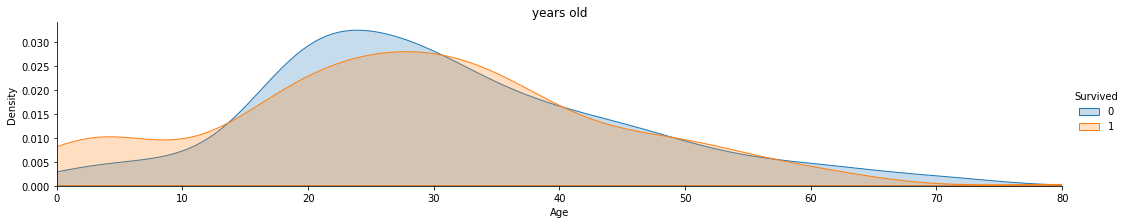

In [37]:
facet = sns.FacetGrid(train, hue="Survived",aspect=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.title('years old')
plt.show() 

(0.0, 20.0)

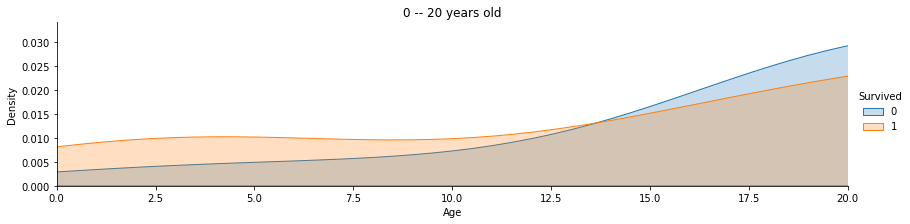

In [38]:


facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.title('0 -- 20 years old')
plt.xlim(0, 20)

(20.0, 40.0)

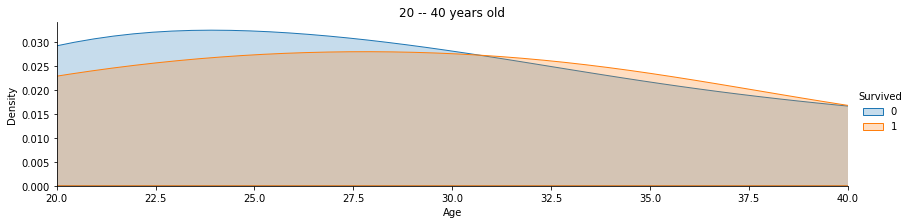

In [39]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.title('20 -- 40 years old')
plt.xlim(20, 40)

<img src="https://pbs.twimg.com/media/DuCrW0CW4AE673n.jpg">

In [40]:
miss = [16, 22]
ms = [18, 26]
mrs = [24, 34]

#parch: The dataset defines family relations in this way...
#Some children travelled only with a nanny, therefore parch=0 for them.
# original_parch = train['Parch']

#original_parch = original_parch # I will use it to define some radom child age   original parch had no NaN value from the begining
child_age = randint(6, 12)

for i, item in enumerate(training['Title']):
    if item in [' Miss', ' Mrs', ' Ms',]:
        #print(str(training.at[i,'Age']))
        if item == ' Miss':
            age = randint(16, 23)
            if str(training.at[i,'Age'])=='nan':
                if str(training_data.at[i,'Parch'])!= 0:
                    training.at[i,'Age']= age
                else:
                    training.at[i,'Age']= child_age
                
        elif item == ' Ms':
            age = randint(18, 26)
            #print(age)
            
            if str(training.at[i,'Age'])=='nan':
                if str(training_data.at[i,'Parch'])!= 0:
                    training.at[i,'Age']= age
                else:
                    training.at[i,'Age']= child_age
                
        elif item == ' Mrs':
            age = randint(24, 34)
            #print(age)
            if str(training.at[i,'Age'])=='nan':
                if str(training_data.at[i,'Parch'])!= 0:
                    training.at[i,'Age']= age
                else:
                    training.at[i,'Age']= child_age


#age =  training[(training['Age'].isnull())]
#age


In [41]:
mean_age = int(training['Age'].mean())
print(mean_age)
training['Age'] =  training['Age'].fillna(randint(mean_age-4, mean_age+4))

29


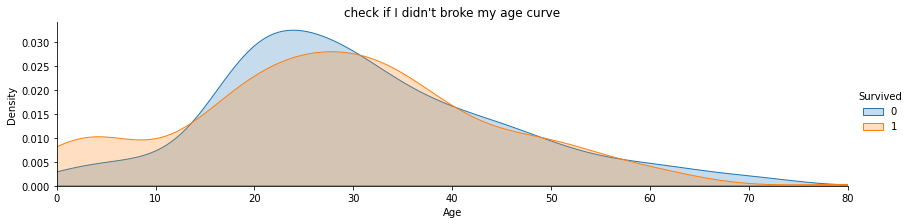

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.title('check if I didn\'t broke my age curve')
plt.show() 

<a id="deepersocialstatus"></a>
# Deeper into Social Status

In [43]:
# More deeper into SocialStatus

def class_affilier(title):
    title = str(title)
    if title in [' Mr']:
        text = 'RegularGuy'
    elif title in [' Master', ' Don', ' Jonkheer', ' Sir']:
        text = 'RichGuy'
    elif title in [' Dr',' Rev',' Major',' Col',' Capt',' Major']:
        text = 'SmartGuy'
    elif title in [' Miss', ' Mrs', ' Ms', ' Mlle']:
        text = 'RegularMiss'
    elif title in [' the Countess',' Lady',' Mme', ' Dona']:
        text = 'RichMiss'

        
    return text


#training['CabinClass'] = training['Fare'].apply(cabin_filler)


training['SocialClass'] = training['Title'].apply(class_affilier)

In [44]:
# More deeper into SocialStatus

def categorize_social_status(title):
    title = str(title)
    if title in [' Mr']:
        text = 0
    elif title in [' Master']:
        text = 1
    elif title in [' Don']:
        text = 2
    elif title in [' Jonkheer']:
        text = 3
    elif title in [' Sir']:
        text = 4
    elif title in [' Dr']:
        text = 5
    elif title in [' Rev']:
        text = 6
    elif title in [' Major']:
        text = 7
    elif title in [' Col']:
        text = 8
    elif title in [' Capt']:
        text = 9
    elif title in [' Miss']:
        text = 11
    elif title in [' Mrs']:
        text = 12
    elif title in [' Ms']:
        text = 13
    elif title in [' Mlle']:
        text = 14
    elif title in [' the Countess']:
        text = 15
    elif title in [' Lady']:
        text = 16
    elif title in [' Mme']:
        text = 17

        
    return text




In [45]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           891 non-null    int64  
 1   Pclass             891 non-null    int64  
 2   Sex                891 non-null    int64  
 3   Age                891 non-null    float64
 4   SibSp              891 non-null    int64  
 5   Parch              891 non-null    int64  
 6   Ticket             891 non-null    object 
 7   Fare               891 non-null    float64
 8   Cabin              204 non-null    object 
 9   Embarked           891 non-null    object 
 10  Title              891 non-null    object 
 11  FamilyName         891 non-null    object 
 12  TitleEncoded       891 non-null    int64  
 13  FamilySize         891 non-null    int64  
 14  EmbarkedNum        891 non-null    int64  
 15  TicketNumber       891 non-null    int64  
 16  TicketHeader       891 non

<a id="corelationprocess"></a>
# Correlation Process

In [46]:
#training = training.drop(['FamilyName', 'SocialStatus', 'Cabin'], axis = 1)

training['Bridge'].replace(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'], [0, 1, 2, 3, 4, 5, 6, 7], inplace = True)
training['SocialClass'].replace(['RichMiss', 'RegularMiss', 'SmartGuy', 'RichGuy', 'RegularGuy'], [0, 1, 2, 3, 4], inplace = True)
training['PassengerByClass'] = training['PassengerByClass'] / training['PassengerByClass'].max()
training['PassengerByBridge'] = training['PassengerByBridge'] / training['PassengerByBridge'].max()
training['Age'] = training['Age'] / training['Age'].max()

In [47]:
corr_matrix = training.select_dtypes(np.number).corr()
corr_matrix[(corr_matrix < 0.1) & (corr_matrix > -0.1)] = 0
corr = corr_matrix["Survived"].sort_values(ascending = False)
print(corr)
indexNames = corr[abs(corr.values) < 0.4].index.values
indexNames = np.setdiff1d(indexNames, ['Id','MSSubClass'])

Survived             1.000000
Sex                  0.543351
TitleEncoded         0.290260
Fare                 0.257307
CabinNumber          0.229756
EmbarkedNum          0.167675
Age                  0.000000
SibSp                0.000000
Parch                0.000000
FamilySize           0.000000
TicketNumber         0.000000
PassengerByBridge    0.000000
Bridge              -0.251462
PassengerByClass    -0.299963
Pclass              -0.338481
SocialClass         -0.556472
Name: Survived, dtype: float64


In [48]:

import plotly.express as px

mask = np.triu(np.ones_like(corr, dtype=bool))
corr_matrix = corr_matrix.mask(mask)
fig = px.imshow(corr_matrix, text_auto=True)
fig.layout.height = 1000
fig.layout.width = 1000
fig.show()

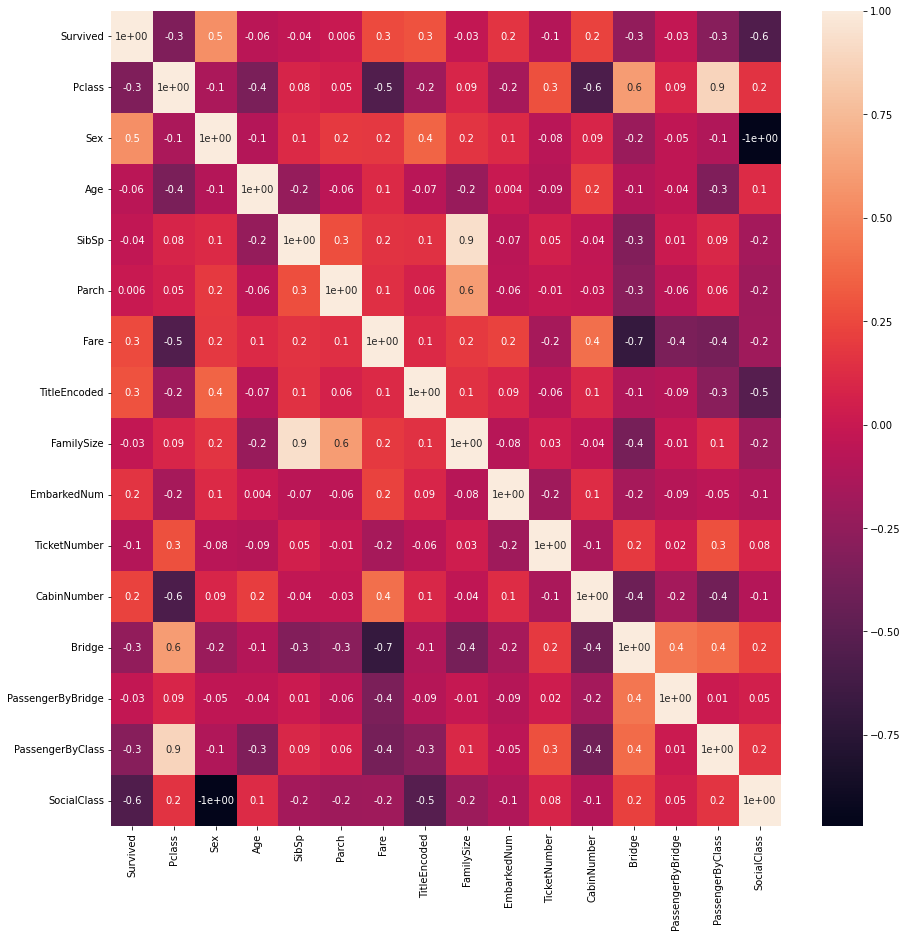

In [49]:
plt.figure(figsize = (15, 15))
sns.heatmap(training.corr(), annot=True, fmt = '0.1');

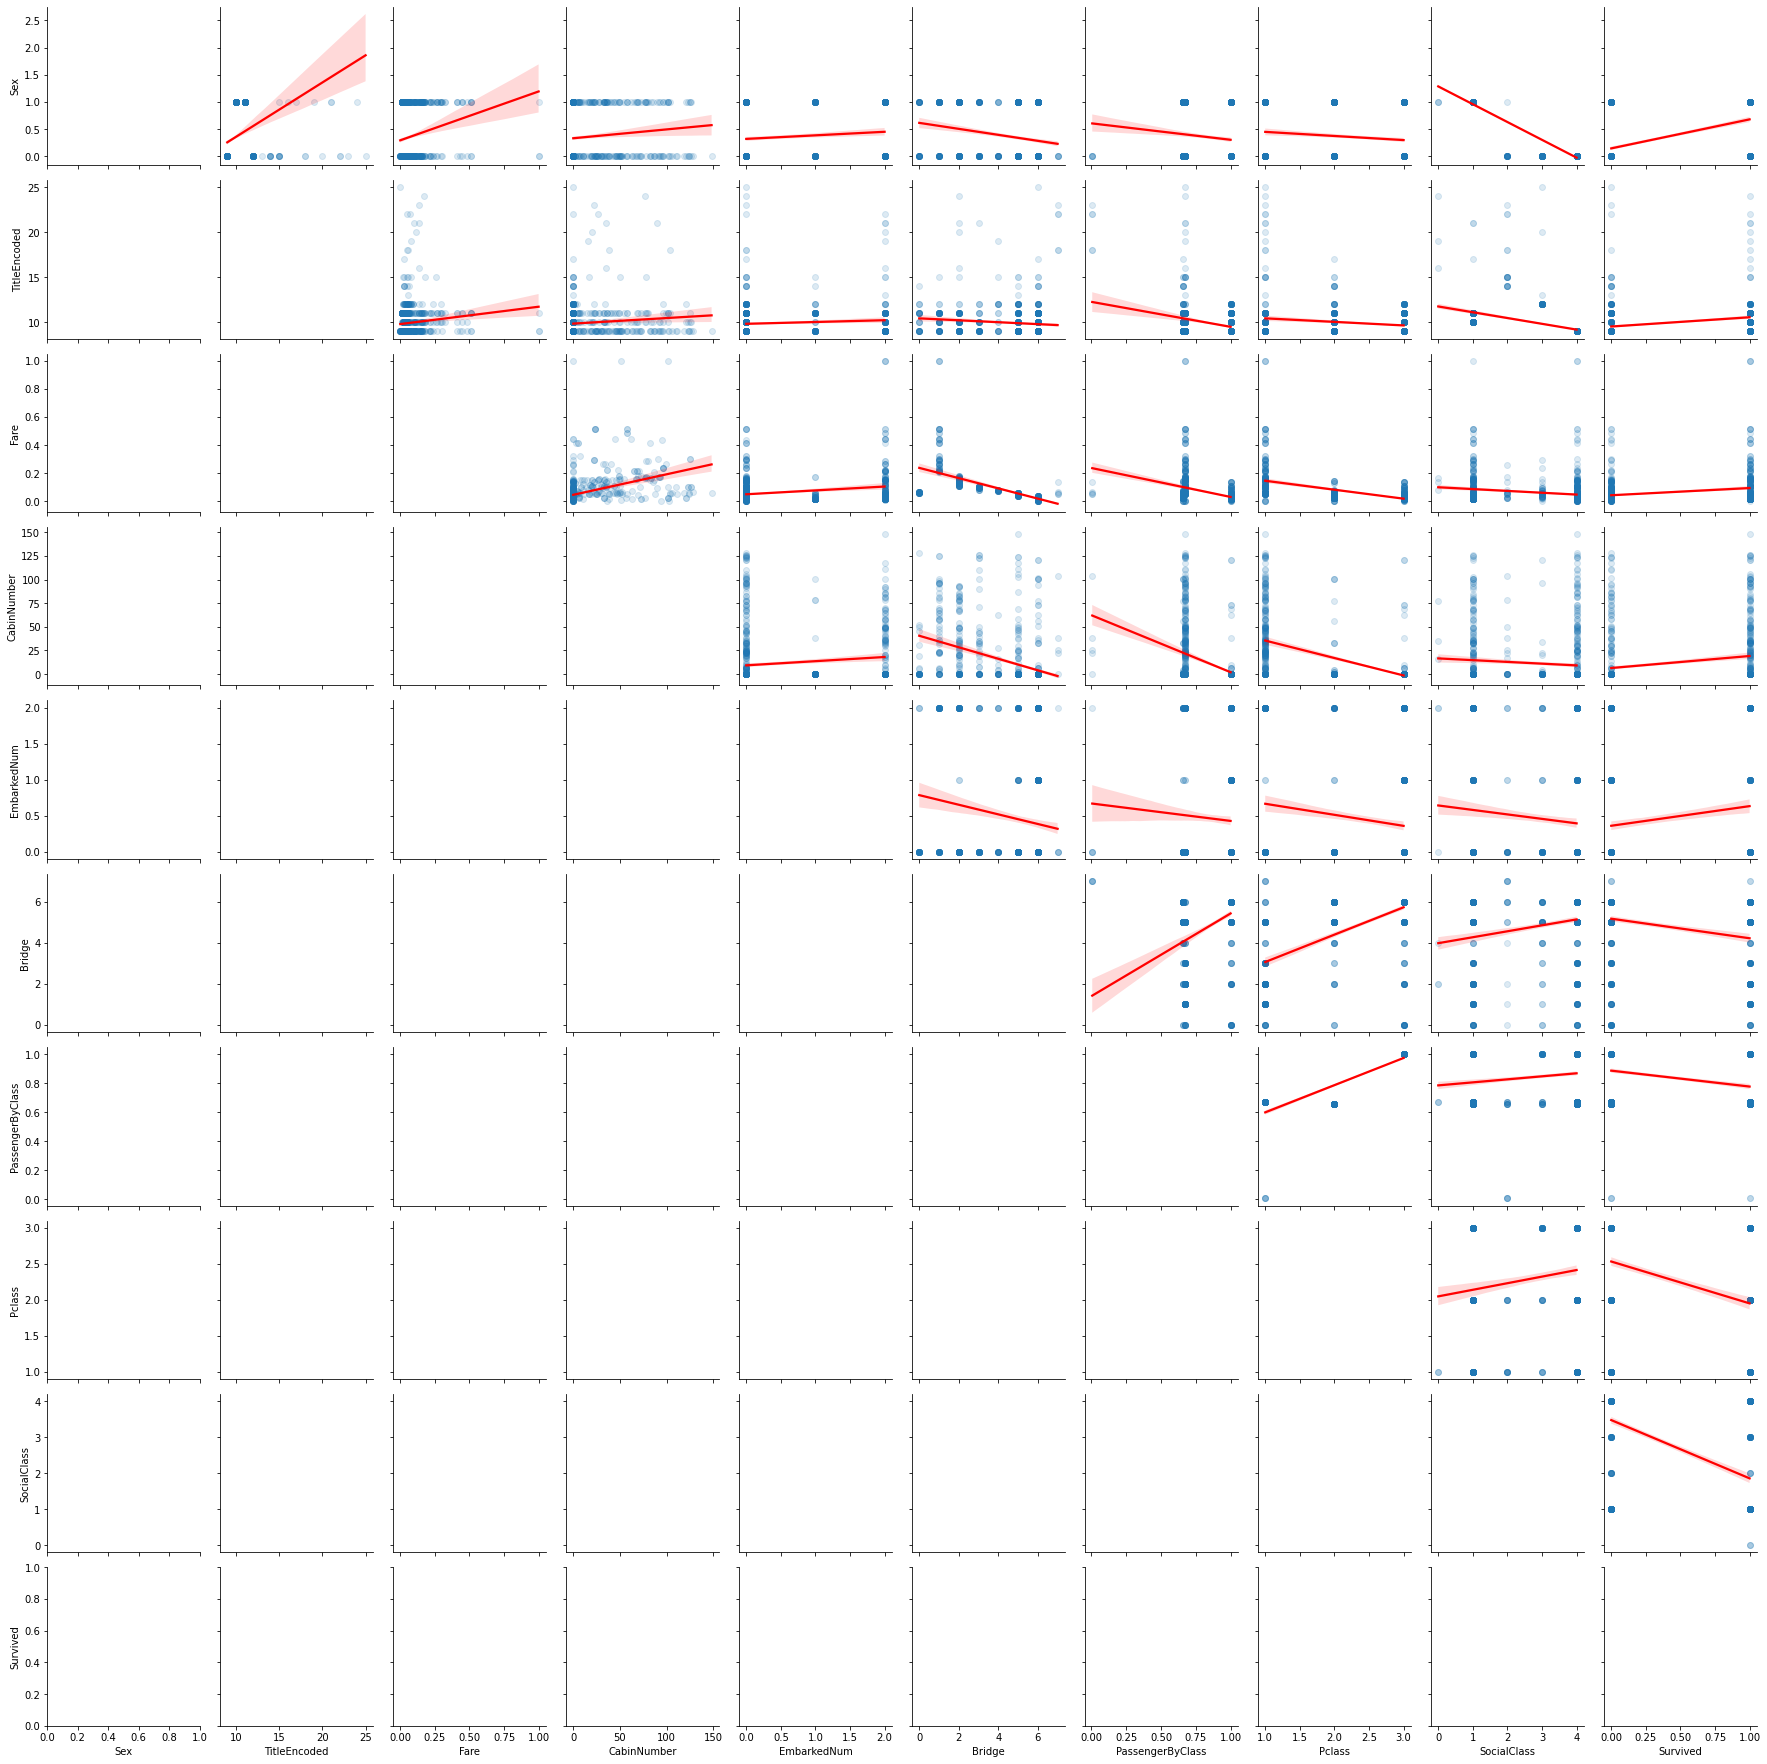

In [50]:
# let's take a closer look to our correlations

# create a sub df
a = training[['Sex', 'TitleEncoded', 'Fare', 'CabinNumber', 'EmbarkedNum',
              'Bridge', 'PassengerByClass', 'Pclass', 'SocialClass', 'Survived']]

g = sns.PairGrid(a)
g = g.map_upper(sns.regplot, scatter_kws={'alpha':0.15}, line_kws={'color':'red'})

<a id="trainingpreprocessing"></a>
# Training Data Process

In [51]:
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,FamilySize,EmbarkedNum,TicketNumber,TicketHeader,CabinLetter,CabinNumber,Bridge,PassengerByBridge,PassengerByClass,SocialClass
0,0,3,0,0.2750,1,1,A/5 21171,0.014151,NaN,S,...,2,0,21171,A/5,nan,0,6,0.529240,1.00000,4
1,1,1,1,0.4750,1,1,PC 17599,0.139136,C85,C,...,2,2,17599,PC,C,85,2,0.453216,0.67154,1
2,1,3,1,0.3250,0,1,STON/O2. 3101282,0.015469,NaN,S,...,1,0,3101282,STON/O2.,nan,0,6,0.529240,1.00000,1
3,1,1,1,0.4375,1,1,113803,0.103644,C123,S,...,2,0,113803,113803,C,123,3,0.416667,0.67154,1
4,0,3,0,0.4375,0,1,373450,0.015713,NaN,S,...,1,0,373450,373450,nan,0,6,0.529240,1.00000,4


In [52]:
# split our data into train and test
y = training['Survived']

'''
Sex            0.543351
Fare           0.257307
Embarked       0.167675
CabinClass    -0.253811
Pclass        -0.338481
SocialClass   -0.556472



Sex                  0.543351
TitleEncoded         0.290260
Fare                 0.257307
CabinNumber          0.229756
EmbarkedNum          0.167675
Bridge              -0.251462
PassengerByClass    -0.299963
Pclass              -0.338481
SocialClass         -0.556472


Age                  0.000000
SibSp                0.000000
Parch                0.000000
FamilySize           0.000000
TicketNumber         0.000000
PassengerByBridge    0.000000

'''
X = training.drop(['Survived', 'Cabin', 'FamilyName', 'Ticket', 'SibSp',
                   'FamilySize', 'Parch', 'PassengerByBridge', 'TicketHeader',
                  'CabinLetter', 'Title', 'Embarked', 'TicketNumber', 'Age'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split( X, y,
                                                    test_size=0.4,
                                                    random_state=42)

# our result are a little bitter

# let's try something
#  DOUBLE TRAIN SET

y2_train = [y_train, y_train]
X2_train = [X_train, X_train]
  
X2_train = pd.concat(X2_train)
y2_train = pd.concat(y2_train)

y4_train = [y2_train, y2_train]
X4_train = [X2_train, X2_train]
  
X4_train = pd.concat(X4_train)
y4_train = pd.concat(y4_train)

X_train = X2_train
y_train = y2_train
#display(result)


# Create list that contain our result 
original_score = []
tuned_score = []

In [53]:


numerical_features = make_column_selector(dtype_include = np.number)
categorical_features = make_column_selector(dtype_exclude = np.number)




numerical_pipeline = make_pipeline(SimpleImputer(),
                                   StandardScaler())

categorical_pipeline = make_pipeline(SimpleImputer(strategy=('most_frequent')),
                                    OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                      (categorical_pipeline, categorical_features))

model = make_pipeline(preprocessor,
                      KNeighborsClassifier())
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f2a0efc6f10>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [54]:

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8895131086142322
0.7871148459383753


Compute the recall.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

Compute the F1 score, also known as balanced F-score or F-measure.

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)

In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

Compute the precision.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

<a id="knn"></a>
# KNN

In [55]:
# KNN 
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
print(KNN.score(X_train, y_train))
print(KNN.score(X_test, y_test))

y_pred = KNN.predict(X_test.copy())
print(f'Precission_score: {precision_score(y_test,y_pred)}')
print(f'Recall_score: {recall_score(y_test,y_pred)}')
print(f'F1-score: {f1_score(y_test,y_pred)}')


train_score = f'KNN -- train -- {KNN.score(X_train, y_train)}'
test_score = f'KNN -- test -- {KNN.score(X_test, y_test)}'

pred_score   = precision_score(y_test,y_pred)
recall_score = recall_score(y_test,y_pred)
f1_score     = f1_score(y_test,y_pred)
scoring = [train_score, test_score,]
original_score.append(scoring)

'''
0.8726591760299626
0.8067226890756303


0.9363295880149812
0.7843137254901961

'''


0.8838951310861424
0.7983193277310925
Precission_score: 0.7593984962406015
Recall_score: 0.7163120567375887
F1-score: 0.7372262773722628


'\n0.8726591760299626\n0.8067226890756303\n\n\n0.9363295880149812\n0.7843137254901961\n\n'

In [56]:
KNN.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [57]:
param_grid = {
    'n_neighbors': [0, 1, 2, 3, 4],
    'weights':['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
    'leaf_size': [10,15,20,25],
    'p':[1, 2]
}


KNN = KNeighborsClassifier()
grid = GridSearchCV(KNN, param_grid, cv=2, scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))


train_score = f'KNN -- train -- {grid.score(X_train, y_train)}'
test_score = f'KNN -- test -- {grid.score(X_test, y_test)}'


print(grid.best_score_)
print(grid.best_params_)
best_param = grid.best_params_

scoring = [train_score, test_score, best_param,]
tuned_score.append(scoring)
'''

0.897003745318352
0.7310924369747899
0.898876404494382
{'n_neighbors': 1, 'p': 1}





0.9288389513108615
0.7843137254901961
0.9288389513108615
{'n_neighbors': 3, 'p': 1}
'''

0.9325842696629213
0.7955182072829131
0.9438202247191011
{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}


"\n\n0.897003745318352\n0.7310924369747899\n0.898876404494382\n{'n_neighbors': 1, 'p': 1}\n\n\n\n\n\n0.9288389513108615\n0.7843137254901961\n0.9288389513108615\n{'n_neighbors': 3, 'p': 1}\n"

<a id="sgd"></a>
# SGD

In [58]:
# SGD
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier()
SGD = SGD.fit(X_train, y_train)
print(SGD.score(X_train, y_train))
print(SGD.score(X_test, y_test))


train_score = f'SGD -- train -- {SGD.score(X_train, y_train)}'
test_score = f'SGD -- test -- {SGD.score(X_test, y_test)}'

scoring = [train_score, test_score,]

original_score.append(scoring)
# better with mini set

'''
0.7677902621722846
0.7450980392156863


0.795880149812734
0.7703081232492998


0.7303370786516854
0.7366946778711485
'''

0.6573033707865169
0.6162464985994398


'\n0.7677902621722846\n0.7450980392156863\n\n\n0.795880149812734\n0.7703081232492998\n\n\n0.7303370786516854\n0.7366946778711485\n'

In [59]:
SGD.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [60]:
param_grid = {
    'loss': ['hinge', 'log_loss', 'log',
             'modified_huber', 'squared_hinge',
             'perceptron' ,'squared_error', 'huber',
             'epsilon_insensitive', 'squared_epsilon_insensitive', ],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.0001, 0.00001, 0.001],
}


SGD = SGDClassifier()
grid = GridSearchCV(SGD, param_grid)
grid.fit(X_train, y_train)

print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))


train_score = f'SGD -- train -- {grid.score(X_train, y_train)}'
test_score = f'SGD -- test -- {grid.score(X_test, y_test)}'


print(grid.best_score_)
print(grid.best_params_)
best_param = grid.best_params_


pred_score   = precision_score(y_test,y_pred)
#recall_score = recall_score(y_test,y_pred)
#f1_score     = f1_score(y_test,y_pred)
scoring = [train_score, test_score, best_param, ]

tuned_score.append(scoring)

0.7846441947565543
0.7450980392156863
0.7827300250098723
{'alpha': 0.001, 'loss': 'perceptron', 'penalty': 'l1'}


<a id="linearsvc"></a>
# LinearSVC

In [61]:
# Linear SVC
from sklearn.svm import LinearSVC


SVC = LinearSVC()
SVC = SVC.fit(X_train, y_train)

print(SVC.score(X_train, y_train))
print(SVC.score(X_test, y_test))

y_pred = SVC.predict(X_test)

train_score = f'LinearSVC -- train -- {SVC.score(X_train, y_train)}'
test_score = f'LinearSVC -- test -- {SVC.score(X_test, y_test)}'

pred_score   = precision_score(y_test,y_pred)
scoring = [train_score, test_score,]


original_score.append(scoring)


'''


0.7883895131086143
0.7535014005602241


0.8014981273408239
0.7759103641456583


0.8014981273408239
0.7787114845938375
'''

0.7640449438202247
0.7535014005602241


'\n\n\n0.7883895131086143\n0.7535014005602241\n\n\n0.8014981273408239\n0.7759103641456583\n\n\n0.8014981273408239\n0.7787114845938375\n'

In [62]:
SVC.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'loss', 'max_iter', 'multi_class', 'penalty', 'random_state', 'tol', 'verbose'])

In [63]:
param_grid = {
    'C': [1, 1.5, 2],
    'penalty': ['l1', 'l2'],
    'tol': [0.0001, 0.00001, 0.001],
}


grid = GridSearchCV(SVC, param_grid)
grid.fit(X_train, y_train)

print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))


train_score = f'LinearSVC -- train -- {grid.score(X_train, y_train)}'
test_score  = f'LinearSVC -- test -- {grid.score(X_test, y_test)}'


print(grid.best_score_)
print(grid.best_params_)


best_param = grid.best_params_
scoring = [train_score, test_score, best_param,]

tuned_score.append(scoring)

0.7696629213483146
0.7703081232492998
0.7920933701899873
{'C': 1, 'penalty': 'l2', 'tol': 0.0001}


<a id="svc"></a>
# SVC

In [64]:
# SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


#SVC = make_pipeline(StandardScaler(), SVC(gamma='auto'))
SVC = SVC(gamma='auto')
SVC = SVC.fit(X_train, y_train)

print(SVC.score(X_train, y_train))
print(SVC.score(X_test, y_test))


train_score = f'SVC -- train -- {SVC.score(X_train, y_train)}'
test_score = f'SVC -- test -- {SVC.score(X_test, y_test)}'
scoring = [train_score, test_score]
original_score.append(scoring)

0.8820224719101124
0.8123249299719888


In [65]:
SVC.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [66]:

param_grid = {
    'C': [1, 1.5, 2],
    #'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 3, 6, 9],
    'gamma': [0.5, 0.05],
    'coef0': [1, 3, 6, 9],
    #'class_weight': [None, 'balanced'],
}

grid = GridSearchCV(SVC, param_grid)
grid.fit(X_train, y_train)

print(grid.score(X_train, y_train))
print(grid.score(X_test, y_test))


train_score = f'SVC -- train -- {grid.score(X_train, y_train)}'
test_score = f'SVC -- test -- {grid.score(X_test, y_test)}'


print(grid.best_score_)
print(grid.best_params_)
best_param = grid.best_params_
scoring = [train_score, test_score, best_param]
tuned_score.append(scoring)

0.900749063670412
0.7899159663865546
0.8970032030187355
{'C': 2, 'coef0': 1, 'degree': 1, 'gamma': 0.5}


<a id="gnb"></a>
# NaiveBayes

In [67]:


# Naive Bayes
from sklearn.naive_bayes import CategoricalNB

GNB = CategoricalNB()
GNB.fit(X_train, y_train)


print(GNB.score(X_train, y_train))
#print(GNB.score(X_test, y_test))


train_score = f'kernel -- train -- {GNB.score(X_train, y_train)}'
#test_score = f'kernel -- test -- {GNB.score(X_test, y_test)}'




scoring = [train_score, test_score]
original_score.append(scoring)



'''
0.8089887640449438


0.8108614232209738




0.8071161048689138


'''

0.8183520599250936


'\n0.8089887640449438\n\n\n0.8108614232209738\n\n\n\n\n0.8071161048689138\n\n\n'

In [68]:
GNB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior', 'min_categories'])

In [69]:
param_grid = {
    'alpha': [0, 0.03,0.1, 0.01],
    'min_categories': [1, 2, 3],
}


GNB = CategoricalNB()
grid = GridSearchCV(GNB, param_grid)
grid.fit(X_train, y_train)

print(grid.score(X_train, y_train))

train_score = f'GNB -- train -- {grid.score(X_train, y_train)}'


print(grid.best_score_)
print(grid.best_params_)




best_param = grid.best_params_
scoring = [train_score, test_score, best_param]
tuned_score.append(scoring)

0.8408239700374532
0.8333070071519459
{'alpha': 0, 'min_categories': 1}


<a id="clf"></a>
# Perceptron

In [70]:
# Perceptron

from sklearn.neural_network import MLPClassifier

CLF = MLPClassifier(max_iter=1500)
CLF.fit(X_train, y_train)
print(CLF.score(X_train, y_train))
print(CLF.score(X_test, y_test))


train_score = f'NN -- train -- {CLF.score(X_train, y_train)}'
test_score = f'NN -- test -- {CLF.score(X_test, y_test)}'


scoring = [train_score, test_score]
original_score.append(scoring)




'''

0.8370786516853933
0.7871148459383753


0.848314606741573
0.8011204481792717


0.8614232209737828
0.7955182072829131


'''

0.8033707865168539
0.7675070028011205


'\n\n0.8370786516853933\n0.7871148459383753\n\n\n0.848314606741573\n0.8011204481792717\n\n\n0.8614232209737828\n0.7955182072829131\n\n\n'

In [71]:
CLF.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [72]:
parameter_space = {
    'hidden_layer_sizes': [(320,860,320), ],
    'activation':['tanh',],
    'solver': ['adam'],
    'alpha': [0.05,],
    'learning_rate':['constant'],
}

CLF = GridSearchCV(CLF, parameter_space, n_jobs=-1, cv=2)
CLF.fit(X_train, y_train)
print(CLF.score(X_train, y_train))
print(CLF.score(X_test, y_test))


train_score = f'NN -- train -- {CLF.score(X_train, y_train)}'
test_score = f'NN -- test -- {CLF.score(X_test, y_test)}'


print(CLF.best_score_)
print(CLF.best_params_)

best_param = CLF.best_params_

scoring = [train_score, test_score, best_param,]
tuned_score.append(scoring)

'''


0.8370786516853933
0.803921568627451
0.8164794007490637
{'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'adaptive', 'solver': 'adam'}


0.8670411985018727
0.8011204481792717
0.8707865168539326
{'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'constant', 'solver': 'adam'}



0.8726591760299626
0.803921568627451
0.8735955056179776
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'constant', 'solver': 'adam'}

'''

0.8707865168539326
0.7899159663865546
0.8651685393258427
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'constant', 'solver': 'adam'}


"\n\n\n0.8370786516853933\n0.803921568627451\n0.8164794007490637\n{'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'adaptive', 'solver': 'adam'}\n\n\n0.8670411985018727\n0.8011204481792717\n0.8707865168539326\n{'activation': 'tanh', 'alpha': 0.005, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'constant', 'solver': 'adam'}\n\n\n\n0.8726591760299626\n0.803921568627451\n0.8735955056179776\n{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'constant', 'solver': 'adam'}\n\n"

<a id="modelresult"></a>
# Model Results

In [73]:
for item in original_score:
    print(item[0])

KNN -- train -- 0.8838951310861424
SGD -- train -- 0.6573033707865169
LinearSVC -- train -- 0.7640449438202247
SVC -- train -- 0.8820224719101124
kernel -- train -- 0.8183520599250936
NN -- train -- 0.8033707865168539


In [74]:
for item in original_score:
    print(item[1])

KNN -- test -- 0.7983193277310925
SGD -- test -- 0.6162464985994398
LinearSVC -- test -- 0.7535014005602241
SVC -- test -- 0.8123249299719888
SVC -- test -- 0.7899159663865546
NN -- test -- 0.7675070028011205


In [75]:
for item in tuned_score:
    print(item[0])

KNN -- train -- 0.9325842696629213
SGD -- train -- 0.7846441947565543
LinearSVC -- train -- 0.7696629213483146
SVC -- train -- 0.900749063670412
GNB -- train -- 0.8408239700374532
NN -- train -- 0.8707865168539326


In [76]:
for item in tuned_score:
    print(item[1])

KNN -- test -- 0.7955182072829131
SGD -- test -- 0.7450980392156863
LinearSVC -- test -- 0.7703081232492998
SVC -- test -- 0.7899159663865546
SVC -- test -- 0.7899159663865546
NN -- test -- 0.7899159663865546


In [77]:
for item in tuned_score:
    print(item[2])

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
{'alpha': 0.001, 'loss': 'perceptron', 'penalty': 'l1'}
{'C': 1, 'penalty': 'l2', 'tol': 0.0001}
{'C': 2, 'coef0': 1, 'degree': 1, 'gamma': 0.5}
{'alpha': 0, 'min_categories': 1}
{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (320, 860, 320), 'learning_rate': 'constant', 'solver': 'adam'}
